In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime
from scipy import stats
from scipy.optimize import curve_fit

In [220]:
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [221]:
#Read in ground data

df_merged = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\merged_datasets.csv')
df_merged.set_index(pd.to_datetime(df_merged.datetime), inplace=True)

In [222]:
#Read in phase angles

df16 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-16_phase_angles.csv')
df16.set_index(pd.to_datetime(df16.datetime_list), inplace=True)

df17 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-17_phase_angles.csv')
df17.set_index(pd.to_datetime(df17.datetime_list), inplace=True)

In [223]:
signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df16.iloc[1:].phase_angle):
    if df16.iloc[i].phase_angle > df16.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df16['signed_phase_angle'] = signed_phase_angles


signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df17.iloc[1:].phase_angle):
    if df17.iloc[i].phase_angle > df17.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df17['signed_phase_angle'] = signed_phase_angles

In [224]:
tcc20_mean_g16 = [0.19133497, 0.131049888, 0.271328671, 0.319058977, 0.317577706, 0.448319376]
tcc20_mean_g17 = [0.124487004, 0.164508393, 0.489817052, 0.526726313, 0.378679694, 0.357195391, 0.446153846]

In [225]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\\'

In [226]:
# GOES-16 timeseries filepaths

pixelA_g16_lst = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_07-14_R.csv')

pixelB_g16_lst = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_07-14_R.csv')

pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_07-14_R.csv')
pixelC_g16_lst = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_01-15_LST.csv')

pixelD_g16_lst = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_07-14_R.csv')

pixelE_g16_lst = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_07-14_R.csv')

pixelNW_g16_lst = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_07-14_R.csv')

# GOES-17 timeseries filepaths

pixelA_g17_lst = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_R.csv')

pixelB_g17_lst = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC1_g17_lst = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_02_01-15_R.csv')
pixelC2_g17_lst = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv')

pixelD_g17_lst = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_R.csv')

pixelE_g17_lst = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_R.csv')

pixelNW_g17_lst = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv')

In [227]:
df_list = [pixelA_g16_lst ,pixelA_g16_rad,pixelB_g16_lst,pixelB_g16_rad,pixelC_g16_rad,pixelC_g16_lst,pixelD_g16_lst,pixelD_g16_rad,pixelE_g16_lst,pixelE_g16_rad,pixelNW_g16_lst,pixelNW_g16_rad,pixelA_g17_lst,pixelA_g17_rad,pixelB_g17_lst,pixelB_g17_rad,pixelC1_g17_lst,pixelC1_g17_rad,pixelC2_g17_rad,pixelC2_g17_lst,pixelD_g17_lst,pixelD_g17_rad,pixelE_g17_lst,pixelE_g17_rad,pixelNW_g17_lst,pixelNW_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)

at what phase angles is the sun above the horizon?

In [441]:
startdate, enddate = '2020-02-11 14', '2020-02-12 01'

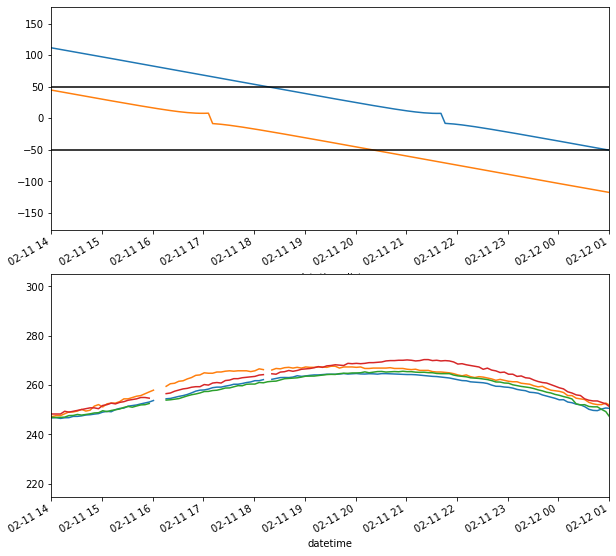

In [442]:
fig, [ax, axA] = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
df17.signed_phase_angle.plot(ax=ax)
df16.signed_phase_angle.plot(ax=ax)

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA)
pixelA_g16_rad.b7_tb_2km.plot(ax=axA)

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA)
pixelA_g17_rad.b7_tb_2km.plot(ax=axA)

ax.set_xlim(startdate, enddate)
axA.set_xlim(startdate, enddate)

ax.axhline(50, c='k')
ax.axhline(-50, c='k')

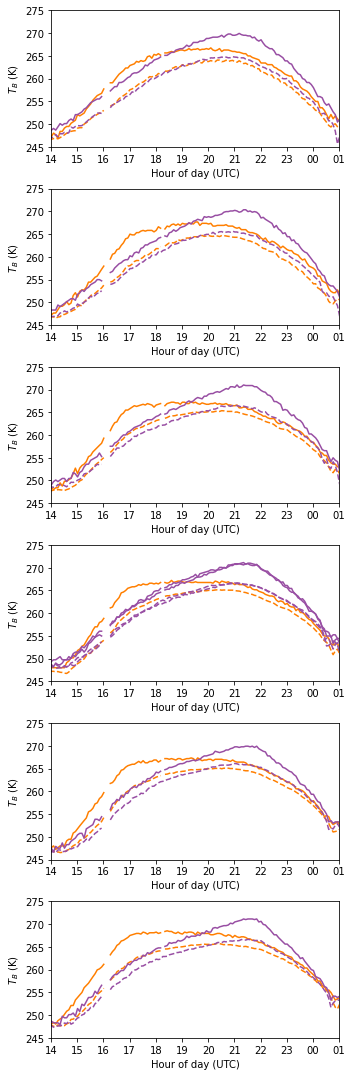

In [446]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='--')
pixelNW_g16_rad.b7_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='-')

# GOES-17
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='--')
pixelNW_g17_rad.b7_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='-')

### Pixel A

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='--')
pixelA_g16_rad.b7_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='-')

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA, color='#984ea3', linestyle='--')
pixelA_g17_rad.b7_tb_2km.plot(ax=axA, color='#984ea3', linestyle='-')

### Pixel B

# GOES-16
pixelB_g16_rad.b13_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='--')
pixelB_g16_rad.b7_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='-')

# GOES-17
pixelB_g17_rad.b13_tb_2km.plot(ax=axB, color='#984ea3', linestyle='--')
pixelB_g17_rad.b7_tb_2km.plot(ax=axB, color='#984ea3', linestyle='-')

### Pixel C

# GOES-16
pixelC_g16_rad.b13_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='--')
pixelC_g16_rad.b7_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='-')

# GOES-17
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC, color='#984ea3', linestyle='--')
pixelC1_g17_rad.b7_tb_2km.plot(ax=axC, color='#984ea3', linestyle='-')

pixelC2_g17_rad.b13_tb_2km.plot(ax=axC, color='#984ea3', linestyle='--')
pixelC2_g17_rad.b7_tb_2km.plot(ax=axC, color='#984ea3', linestyle='-')

### Pixel D

# GOES-16
pixelD_g16_rad.b13_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='--')
pixelD_g16_rad.b7_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='-')

# GOES-17
pixelD_g17_rad.b13_tb_2km.plot(ax=axD, color='#984ea3', linestyle='--')
pixelD_g17_rad.b7_tb_2km.plot(ax=axD, color='#984ea3', linestyle='-')

### Pixel E

# GOES-16
pixelE_g16_rad.b13_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='--')
pixelE_g16_rad.b7_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='-')

# GOES-17
pixelE_g17_rad.b13_tb_2km.plot(ax=axE, color='#984ea3', linestyle='--')
pixelE_g17_rad.b7_tb_2km.plot(ax=axE, color='#984ea3', linestyle='-')

# formatting
for this_ax in axs.ravel():
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(245,275)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

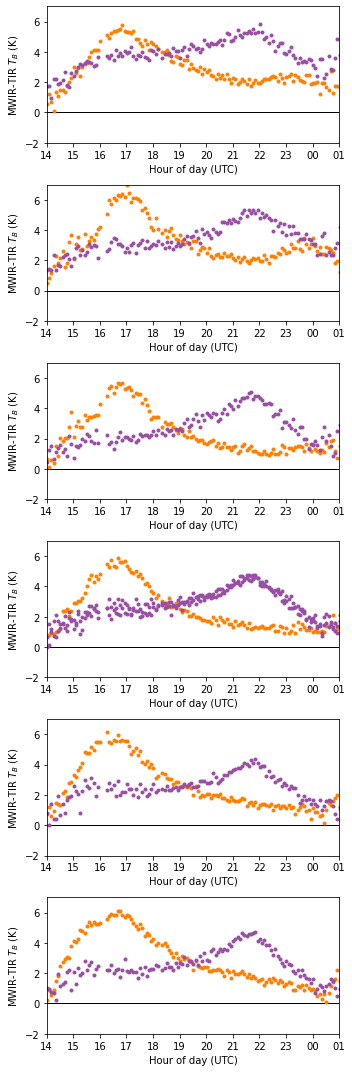

In [444]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
(pixelNW_g16_rad.b7_tb_2km - pixelNW_g16_rad.b13_tb_2km).plot(ax=axNW, linestyle='none', marker='.', color='#ff7f00')

# GOES-17
(pixelNW_g17_rad.b7_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(ax=axNW, linestyle='none', marker='.', color='#984ea3')

### Pixel A

# GOES-16
(pixelA_g16_rad.b7_tb_2km - pixelA_g16_rad.b13_tb_2km).plot(ax=axA, linestyle='none', marker='.', color='#ff7f00')

# GOES-17
(pixelA_g17_rad.b7_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA, linestyle='none', marker='.', color='#984ea3')

### Pixel B

# GOES-16
(pixelB_g16_rad.b7_tb_2km - pixelB_g16_rad.b13_tb_2km).plot(ax=axB, linestyle='none', marker='.', color='#ff7f00')

# GOES-17
(pixelB_g17_rad.b7_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(ax=axB, linestyle='none', marker='.', color='#984ea3')

### Pixel C

# GOES-16
(pixelC_g16_rad.b7_tb_2km - pixelC_g16_rad.b13_tb_2km).plot(ax=axC, linestyle='none', marker='.', color='#ff7f00')


# GOES-17
(pixelC1_g17_rad.b7_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(ax=axC, linestyle='none', marker='.', color='#984ea3')


(pixelC2_g17_rad.b7_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(ax=axC, linestyle='none', marker='.', color='#984ea3')


### Pixel D

# GOES-16
(pixelD_g16_rad.b7_tb_2km - pixelD_g16_rad.b13_tb_2km).plot(ax=axD, linestyle='none', marker='.', color='#ff7f00')


# GOES-17
(pixelD_g17_rad.b7_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(ax=axD, linestyle='none', marker='.', color='#984ea3')


### Pixel E

# GOES-16
(pixelE_g16_rad.b7_tb_2km - pixelE_g16_rad.b13_tb_2km).plot(ax=axE, linestyle='none', marker='.', color='#ff7f00')


# GOES-17
(pixelE_g17_rad.b7_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE, linestyle='none', marker='.', color='#984ea3')


# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, color='k', zorder=-999, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(-2,7)
    this_ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')

C:\Users\steve\AppData\Local\Temp\ipykernel_9448\134292456.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  axNW.plot(df17.signed_phase_angle[startdate:enddate], pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\134292456.py:14: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  axA.plot(df17.signed_phase_angle[startdate:enddate], pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\134292456.py:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing

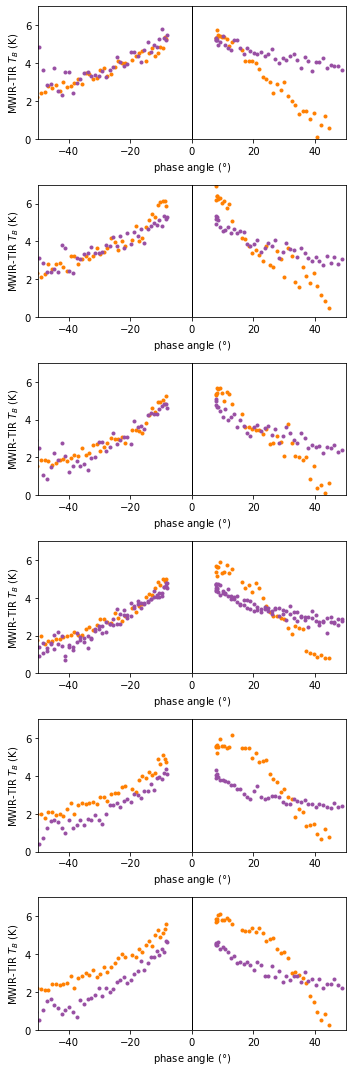

In [445]:
df17 = df17.reindex(pixelNW_g17_rad.index, axis=0)


# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


axNW.plot(df16.signed_phase_angle[startdate:enddate], pixelNW_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelNW_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axNW.plot(df17.signed_phase_angle[startdate:enddate], pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')

axA.plot(df16.signed_phase_angle[startdate:enddate], pixelA_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelA_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axA.plot(df17.signed_phase_angle[startdate:enddate], pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')

axB.plot(df16.signed_phase_angle[startdate:enddate], pixelB_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelB_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axB.plot(df17.signed_phase_angle[startdate:enddate], pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')

axC.plot(df16.signed_phase_angle[startdate:enddate], pixelC_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelC_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axC.plot(df17.signed_phase_angle[startdate:enddate], pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')
axC.plot(df17.signed_phase_angle[startdate:enddate], pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')


axD.plot(df16.signed_phase_angle[startdate:enddate], pixelD_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelD_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axD.plot(df17.signed_phase_angle[startdate:enddate], pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')


axE.plot(df16.signed_phase_angle[startdate:enddate], pixelE_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelE_g16_rad.b13_tb_2km[df16.index][startdate:enddate], '.', color='#ff7f00')
axE.plot(df17.signed_phase_angle[startdate:enddate], pixelE_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelE_g17_rad.b13_tb_2km[df17.index][startdate:enddate], '.', color='#984ea3')



for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.set_xlim(-50,50)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle ($\degree$)')
    ax.axvline(0, color='k', zorder=-999, lw=1)

---

In [418]:
def backscatter_function(phase_angles, e0, A, B, C, D):
    
    # half width, peak magnitude, shift up or down, symetrical linear, asymmetrical linear
    
    return A / (1+(abs(phase_angles))/e0) + B + C*phase_angles + D*phase_angles

In [419]:
def fit_backscatter_function(xdata, ydata, phase_angle_limit):
    
    ydata = ydata[(xdata>=-phase_angle_limit) & (xdata<=phase_angle_limit)]
    xdata = xdata[(xdata>=-phase_angle_limit) & (xdata<=phase_angle_limit)]

    parameters, covariance = curve_fit(backscatter_function, xdata, ydata, maxfev=5000)
    print(parameters)
    x_fit = np.arange(xdata.min(),xdata.max())
    y_fit = backscatter_function(x_fit, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])
    
    x_fit = np.arange(xdata.min(),xdata.max())
    y_fit = backscatter_function(x_fit, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])
    
    return x_fit, y_fit, parameters

NW
[49.70327464 10.11825973 -5.20713364 -5.42685082  5.38758935]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:20: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[261.62582669  18.16153955 -14.02003063   7.00894549  -6.98039507]
A
[-4.09665982e+00 -1.16073366e+01 -2.67155410e-01 -2.70172740e-02
  6.25256366e-03]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:34: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:35: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[ 526.82704393   36.45547917  -32.41667636 -100.62117414  100.63995196]
B
[-3.28398736e+00 -1.75451109e+01 -1.53597878e+00 -1.23545300e-02
 -1.86304644e-02]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:48: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:49: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[105.18097369  11.39955124  -7.22567301  -0.48016647   0.49745926]
C
[ 3.41408666e+01  1.29398693e+01 -6.99001885e+00 -2.95972994e-02
 -2.88757119e-02]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:62: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:63: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[36.21758503  6.90916519 -2.20941134  1.69269171 -1.67529663]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:68: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:69: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[138.10965243  11.6862318   -7.87313388  -3.40370374   3.42379369]
D
[ 4.78667200e+02  7.98360024e+02 -7.91465632e+02 -6.70833981e-01
 -7.31823079e-01]


C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:82: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xdata = df17.signed_phase_angle[startdate:enddate]
C:\Users\steve\AppData\Local\Temp\ipykernel_9448\160179477.py:83: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ydata = pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate]


[63.31237984  7.12372266 -3.49558308  0.57097088 -0.55550693]
E


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

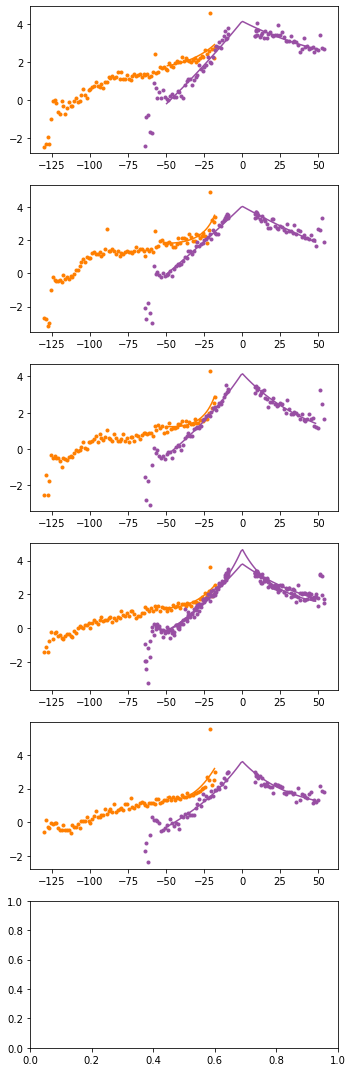

In [420]:
df17 = df17.reindex(pixelNW_g17_rad.index, axis=0)

g16_parameters = []
g17_parameters = []

phase_angle_limit = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

print('NW')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelNW_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelNW_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axNW.plot(x_fit,y_fit,'-', color='#ff7f00')
axNW.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axNW.plot(x_fit,y_fit,'-', color='#984ea3')
axNW.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

print('A')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelA_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelA_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axA.plot(x_fit,y_fit,'-', color='#ff7f00')
axA.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axA.plot(x_fit,y_fit,'-', color='#984ea3')
axA.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

print('B')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelB_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelB_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axB.plot(x_fit,y_fit,'-', color='#ff7f00')
axB.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axB.plot(x_fit,y_fit,'-', color='#984ea3')
axB.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

print('C')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelC_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelC_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axC.plot(x_fit,y_fit,'-', color='#ff7f00')
axC.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axC.plot(x_fit,y_fit,'-', color='#984ea3')
axC.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axC.plot(x_fit,y_fit,'-', color='#984ea3')
axC.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

print('D')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelD_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelD_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axD.plot(x_fit,y_fit,'-', color='#ff7f00')
axD.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axD.plot(x_fit,y_fit,'-', color='#984ea3')
axD.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

print('E')
xdata = df16.signed_phase_angle[startdate:enddate]
ydata = pixelE_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelE_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axE.plot(x_fit,y_fit,'-', color='#ff7f00')
axE.plot(xdata, ydata, '.', color='#ff7f00')
g16_parameters.append(parameters)
xdata = df17.signed_phase_angle[startdate:enddate]
ydata = pixelE_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelE_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
x_fit, y_fit, parameters = fit_backscatter_function(xdata, ydata, phase_angle_limit)
axE.plot(x_fit,y_fit,'-', color='#984ea3')
axE.plot(xdata, ydata, '.', color='#984ea3')
g17_parameters.append(parameters)

for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.set_xlim(-phase_angle_limit,phase_angle_limit)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle ($\degree$)')